In [3]:
# Importing Libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import nltk
import sklearn
import gensim

from itertools import islice
from wordcloud import WordCloud


%matplotlib inline



C:\Users\dimik\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:


# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install gensim

# python -m spacy download en_core_web_sm

In [4]:
LocationTrue = r'./True.csv'
LocationFake = r'./Fake.csv'

dfTrue = pd.read_csv(LocationTrue)
dfFake = pd.read_csv(LocationFake)

# 1. Preprocessing

In [5]:
# remove stopwords
def removeStopwords(string, stopwords):
    for w in stopwords:
        string.replace(w, '')

    return string


def tokenize_lemmatize(string):
    text = nltk.WhitespaceTokenizer().tokenize(string)
    
    lemmatizer = nltk.stem.WordNetLemmatizer()
    
    for i in range(len(text)):
        text[i] = lemmatizer.lemmatize(text[i])
    
    print(text)
    newText = " ".join(text)

    return newText
    

def preprocessing(dataframe):
    symbols = "[!\"#$%&()*+-./:;<=>?@[\]^_`{|}'~\n]"
    
    dataframe['title'] = dataframe['title'].lower()
#     dataframe['title'] = dataframe['title'].str.replace(symbols, '', regex=True)
    
    if True:
        text = text.split()
        new_text = []
        for word in text:
            if word in contractions:
                new_text.append(contractions[word])
            else:
                new_text.append(word)
        text = " ".join(new_text)
        
        
        
        
        
    dataframe['text'] = dataframe['text'].lower()
#     dataframe['text'] = dataframe['text'].str.replace(symbols, '', regex=True)

# preprocessing(dfTrue)
# preprocessing(dfFake)
dfTrue

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [6]:
titles = dfTrue['title'].tolist()
texts = dfTrue['text'].tolist()

# 2. Data Exploration

<!-- https://lena-voita.github.io/nlp_course/word_embeddings.html
https://github.com/kavgan/nlp-in-practice/blob/master/tf-idf/Keyword%20Extraction%20with%20TF-IDF%20and%20SKlearn.ipynb
https://web.stanford.edu/~jurafsky/slp3/slides/LM_4.pdf -->

https://towardsdatascience.com/keyword-extraction-with-bert-724efca412ea

### 2.α) True news WordCloud

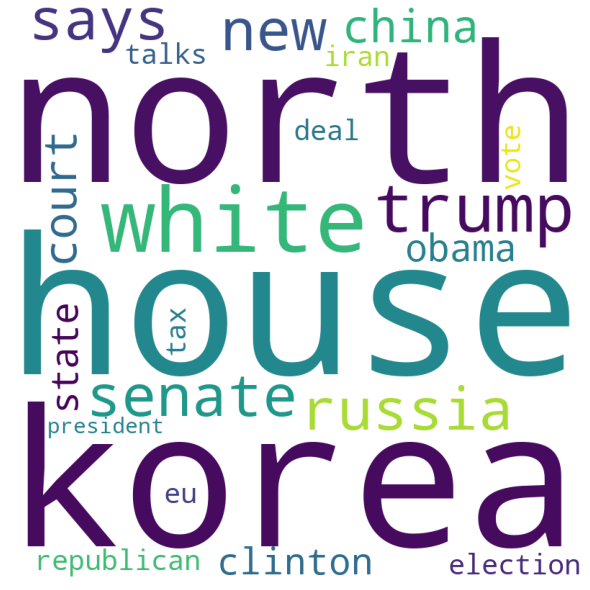

In [7]:
from sklearn.feature_extraction.text import CountVectorizer


titles_true = dfTrue['title'].tolist()

dicTrueTitle = {}

n_gram_range = (1, 2)
stop_words = "english"

for i in range(len(titles_true)):
    count = CountVectorizer(ngram_range=n_gram_range, stop_words=stop_words).fit([titles_true[i]])
    candidates = count.get_feature_names()
    for w in candidates:
        if w in dicTrueTitle:
            dicTrueTitle[w] += 1
        else:
            dicTrueTitle[w] = 1

dicTrueTitle = dict(sorted(dicTrueTitle.items(), key=lambda item: item[1], reverse=True))
# n_items = list(dic.keys())

n_items = list(islice(dicTrueTitle, 25))



# Create the wordcloud
comment_words = ''
for i in range(len(n_items)):
        n_items[i] = n_items[i].lower()
      
comment_words += " ".join(n_items)+" "
    

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

### Fake News WordCloud

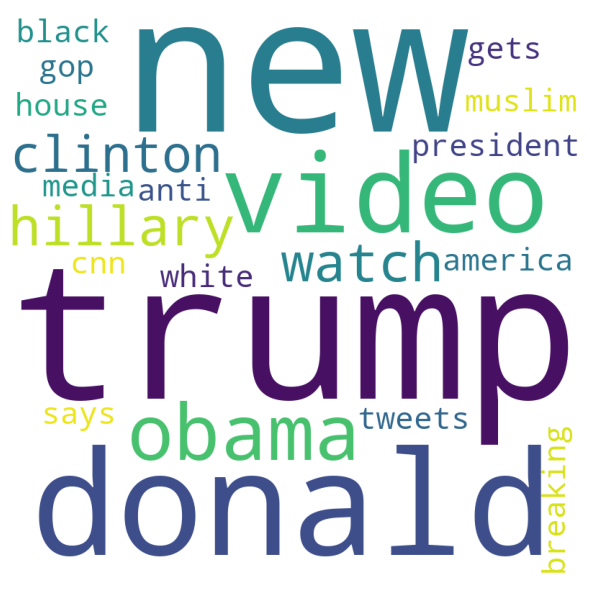

In [8]:
from sklearn.feature_extraction.text import CountVectorizer


titles_Fake = dfFake['title'].tolist()

dicFakeTitle = {}

n_gram_range = (1, 2)
stop_words = "english"

for i in range(len(titles_Fake)):
    count = CountVectorizer(ngram_range=n_gram_range, stop_words=stop_words).fit([titles_Fake[i]])
    candidates = count.get_feature_names()
    for w in candidates:
        if w in dicFakeTitle:
            dicFakeTitle[w] += 1
        else:
            dicFakeTitle[w] = 1

dicFakeTitle = dict(sorted(dicFakeTitle.items(), key=lambda item: item[1], reverse=True))
# n_items = list(dic.keys())

n_items = list(islice(dicFakeTitle, 25))

comment_words = ''
for i in range(len(n_items)):
        n_items[i] = n_items[i].lower()
      
comment_words += " ".join(n_items)+" "
    

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

### 2.β) Graphs

Mesos oros charakthrwn  sta true news titles: 64
Mesos oros charakthrwn  sta fake news titles: 94


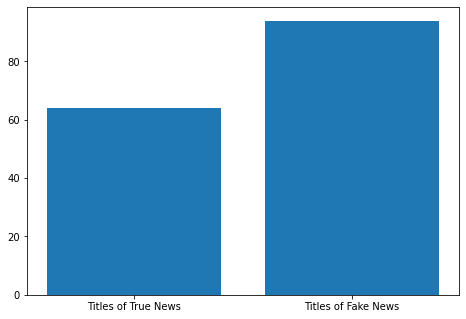

In [9]:
#mesos oros gia true titles :

dfTrue_titles = dfTrue.copy()

dfTrue_titles = pd.DataFrame(dfTrue_titles, columns=['title'])
dfTrue_titles = dfTrue_titles.values.tolist()

num_titles_true=0
for i in dfTrue_titles:
    num_titles_true=num_titles_true+1   
    
count = 0
total_len = 0
for i in dfTrue_titles:
    str = dfTrue_titles[count]
    count = count+1
    
    curr_str = str[0]
    total_len = total_len + len(curr_str)

average_chars = total_len / (count-1)
average_chars = int(average_chars)
av_tr = average_chars
print("Mesos oros charakthrwn  sta true news titles:", average_chars)


#mesos oros gia fake titles :

dfFake_titles = dfFake.copy()

dfFake_titles = pd.DataFrame(dfFake_titles, columns=['title'])
dfFake_titles = dfFake_titles.values.tolist()

num_titles_fake=0
for i in dfFake_titles:
    num_titles_fake=num_titles_fake+1
    
    
count = 0
total_len = 0
average_chars = 0
for i in dfFake_titles:
    str = dfFake_titles[count]
    count = count+1
    
    curr_str = str[0]
    total_len = total_len + len(curr_str)

average_chars = total_len / (count-1)
average_chars = int(average_chars)
av_fal = average_chars
print("Mesos oros charakthrwn  sta fake news titles:", average_chars)

#grafhma

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
titles = ['Titles of True News', 'Titles of Fake News']
nums = [av_tr, av_fal]
ax.bar(titles, nums)
plt.show()

Mesos oros charakthrwn  sta true news texts: 2383
Mesos oros charakthrwn  sta fake news texts: 2547


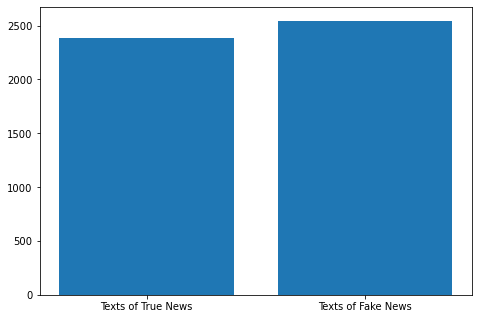

In [10]:
#mesos oros gia true texts:

dfTrue_texts = dfTrue.copy()

dfTrue_texts = dfTrue['text'].tolist()

num_texts_true = len(dfTrue_texts)
    
count = 0
total_len = 0
average_chars = 0
for i in dfTrue_texts:
    str = dfTrue_texts[count]
    count = count+1
        
    curr_str = str
    total_len = total_len + len(curr_str)

average_chars = total_len / (count-1)
average_chars = int(average_chars)
av_tr = average_chars
print("Mesos oros charakthrwn  sta true news texts:", average_chars)

#mesos oros gia fake texts:

dfFake_texts = dfFake.copy()

dfFake_texts = dfFake['text'].tolist()

num_texts_fake = len(dfFake_texts)
    
count = 0
total_len = 0
average_chars = 0
for i in dfFake_texts:
    str = dfFake_texts[count]
    count = count+1
        
    curr_str = str
    total_len = total_len + len(curr_str)

average_chars = total_len / (count-1)
average_chars = int(average_chars)
av_fal = average_chars
print("Mesos oros charakthrwn  sta fake news texts:", average_chars)

#grafhma

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
titles = ['Texts of True News', 'Texts of Fake News']
nums = [av_tr, av_fal]
ax.bar(titles, nums)
plt.show()

### 2.γ) Κατανομή

H sthlh titles sta true exei synolika 213195 lekseis
H sthlh text sta true exei synolika 8259254 lekseis


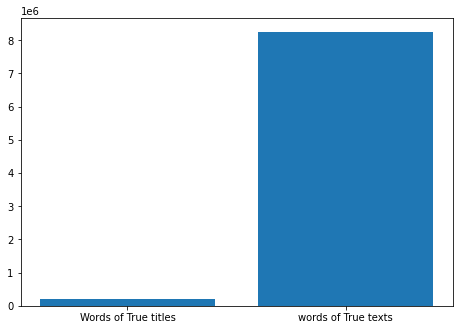

In [11]:
#arxeio True

dfTrue_titles = dfTrue.copy()

dfTrue_titles = pd.DataFrame(dfTrue_titles, columns=['title'])
dfTrue_titles = dfTrue_titles.values.tolist()

num_titles_true=0
for i in dfTrue_titles:
    num_titles_true=num_titles_true+1   
    
count = 0
words = 0
for i in dfTrue_titles:
    str = dfTrue_titles[count]
    count = count+1
    
    curr_str = str[0]
    word_list = curr_str.split()
    words = words + len(word_list)
    
true_titles_words = words    
     
print("H sthlh titles sta true exei synolika", words , "lekseis") 

dfTrue_texts = dfTrue.copy()

dfTrue_texts = pd.DataFrame(dfTrue_texts, columns=['text'])
dfTrue_texts = dfTrue_texts.values.tolist()

num_texts_true=0
for i in dfTrue_texts:
    num_texts_true=num_texts_true+1   
    
count = 0
words = 0
for i in dfTrue_texts:
    str = dfTrue_texts[count]
    count = count+1
    
    curr_str = str[0]
    word_list = curr_str.split()
    words = words + len(word_list)
    
true_texts_words = words    
     
print("H sthlh text sta true exei synolika", words , "lekseis")  

#grafhma

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
titles = ['Words of True titles', 'words of True texts']
nums = [true_titles_words, true_texts_words]
ax.bar(titles, nums)
plt.show()

H sthlh titles sta fake exei synolika 345941 lekseis
H sthlh text sta fake exei synolika 9937110 lekseis


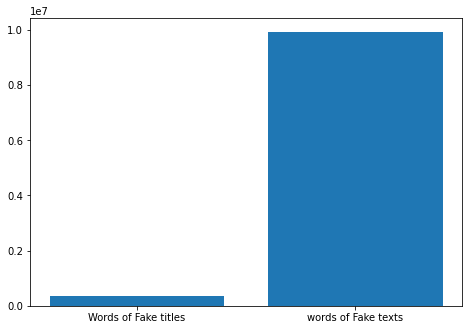

In [12]:
#arxeio Fake

dfFake_titles = dfFake.copy()

dfFake_titles = pd.DataFrame(dfFake_titles, columns=['title'])
dfFake_titles = dfFake_titles.values.tolist()

num_titles_fake=0
for i in dfTrue_titles:
    num_titles_fake=num_titles_fake+1   
    
count = 0
words = 0
for i in dfFake_titles:
    str = dfFake_titles[count]
    count = count+1
    
    curr_str = str[0]
    word_list = curr_str.split()
    words = words + len(word_list)
    
fake_titles_words = words       
     
print("H sthlh titles sta fake exei synolika", words , "lekseis") 

dfFake_texts = dfFake.copy()

dfFake_texts = pd.DataFrame(dfFake_texts, columns=['text'])
dfFake_texts = dfFake_texts.values.tolist()

num_texts_fake=0
for i in dfFake_texts:
    num_texts_fake=num_texts_fake+1   
    
count = 0
words = 0
for i in dfFake_texts:
    str = dfFake_texts[count]
    count = count+1
    
    curr_str = str[0]
    word_list = curr_str.split()
    words = words + len(word_list)
    
fake_texts_words = words    
     
print("H sthlh text sta fake exei synolika", words , "lekseis")  

#grafhma

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
titles = ['Words of Fake titles', 'words of Fake texts']
nums = [fake_titles_words, fake_texts_words]
ax.bar(titles, nums)
plt.show()

### 2.δ) Κατανομή χωρίς stopwords

In [ ]:
#arxeio True

nltk.download('punkt')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

#titles

stop_words = set(stopwords.words('english'))

dfTrue_titles = dfTrue.copy()

dfTrue_titles = pd.DataFrame(dfTrue_titles, columns=['title'])
dfTrue_titles = dfTrue_titles.values.tolist()

num_titles_true=0
for i in dfTrue_titles:
    num_titles_true=num_titles_true+1   
    
count = 0
words = 0
for i in dfTrue_titles:
    str = dfTrue_titles[count]
    count = count+1
    
    curr_str = str[0]
    
    word_tokens = word_tokenize(curr_str)
    
    filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
 
    filtered_sentence = []
 
    for w in word_tokens:
        if w not in stop_words:
            filtered_sentence.append(w)
      
    curr_words = 0
    for word in filtered_sentence:
         curr_words = curr_words + 1
    
    words = words + curr_words
    
true_titles_words = words    
     
print("H sthlh titles sta true exei synolika", words , "lekseis") 

#texts

stop_words = set(stopwords.words('english'))

dfTrue_texts = dfTrue.copy()

dfTrue_texts = pd.DataFrame(dfTrue_texts, columns=['text'])
dfTrue_texts = dfTrue_texts.values.tolist()

num_texts_true=0
for i in dfTrue_texts:
    num_texts_true=num_texts_true+1   
    
count = 0
words = 0
for i in dfTrue_texts:
    str = dfTrue_texts[count]
    count = count+1
    
    curr_str = str[0]
        
    word_tokens2 = word_tokenize(curr_str)
    
    filtered_sentence2 = [w for w in word_tokens2 if not w.lower() in stop_words]
 
    filtered_sentence2 = []
 
    for w in word_tokens2:
        if w not in stop_words:
            filtered_sentence2.append(w)
      
    curr_words = 0
    for word in filtered_sentence2:
         curr_words = curr_words + 1
                
    words = words + curr_words
    
true_texts_words = words    
     
print("H sthlh text sta true exei synolika", words , "lekseis")  

#grafhma

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
titles = ['Words of True titles', 'words of True texts']
nums = [true_titles_words, true_texts_words]
ax.bar(titles, nums)
plt.show()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dimik\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


H sthlh titles sta true exei synolika 406561 lekseis
H sthlh text sta true exei synolika 6935100 lekseis


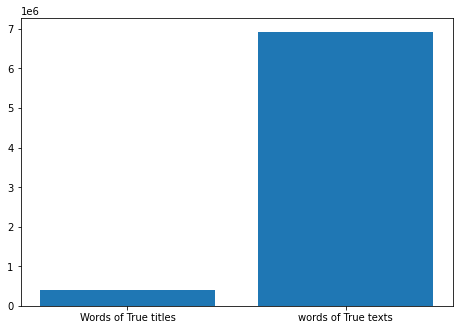

In [14]:
#arxeio Fake

nltk.download('punkt')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

#titles

stop_words = set(stopwords.words('english'))

dfFake_titles = dfFake.copy()

dfFake_titles = pd.DataFrame(dfFake_titles, columns=['title'])
dfFake_titles = dfFake_titles.values.tolist()

num_titles_fake=0
for i in dfFake_titles:
    num_titles_fake=num_titles_fake+1   
    
count = 0
words = 0
for i in dfFake_titles:
    str = dfFake_titles[count]
    count = count+1
    
    curr_str = str[0]
    
    word_tokens = word_tokenize(curr_str)
    
    filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
 
    filtered_sentence = []
 
    for w in word_tokens:
        if w not in stop_words:
            filtered_sentence.append(w)
      
    curr_words = 0
    for word in filtered_sentence:
         curr_words = curr_words + 1
    
    words = words + curr_words
    
fake_titles_words = words    
     
print("H sthlh titles sta true exei synolika", words , "lekseis") 

#texts

stop_words = set(stopwords.words('english'))

dfFake_texts = dfFake.copy()

dfFake_texts = pd.DataFrame(dfFake_texts, columns=['text'])
dfFake_texts = dfFake_texts.values.tolist()

num_texts_fake=0
for i in dfFake_texts:
    num_texts_true=num_texts_true+1   
    
count = 0
words = 0
for i in dfFake_texts:
    str = dfFake_texts[count]
    count = count+1
    
    curr_str = str[0]
        
    word_tokens2 = word_tokenize(curr_str)
    
    filtered_sentence2 = [w for w in word_tokens2 if not w.lower() in stop_words]
 
    filtered_sentence2 = []
 
    for w in word_tokens2:
        if w not in stop_words:
            filtered_sentence2.append(w)
      
    curr_words = 0
    for word in filtered_sentence2:
         curr_words = curr_words + 1
                
    words = words + curr_words
    
fake_texts_words = words    
     
print("H sthlh text sta true exei synolika", words , "lekseis")  

#grafhma

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
titles = ['Words of True titles', 'words of True texts']
nums = [fake_titles_words, fake_texts_words]
ax.bar(titles, nums)
plt.show()

### 2.ε) Bigrams

In [15]:
#number of Most common Bygrams we want to show
n = 20

#### Bygrams Gia True Titles

In [16]:
nBygramsTrueTitles = list(islice(dicTrueTitle, len(dicTrueTitle)))

def keepBygrams(string):
    if ' ' in string:
        return True
    return False

nBygramsTrueTitles = list(filter(keepBygrams, nBygramsTrueTitles))

nBygramsTrueTitles = list(islice(nBygramsTrueTitles, n))
print(nBygramsTrueTitles)



['white house', 'north korea', 'trump says', 'islamic state', 'supreme court', 'puerto rico', 'south korea', 'travel ban', 'says trump', 'trump administration', 'factbox trump', 'house speaker', 'new york', 'nuclear deal', 'russia probe', 'foreign minister', 'trump twitter', 'attorney general', 'north korean', 'saudi arabia']


#### Bygrams gia Fake Title

In [17]:
nBygramsFakeTitles = list(islice(dicFakeTitle, len(dicFakeTitle)))

nBygramsFakeTitles = list(filter(keepBygrams,nBygramsFakeTitles))

nBygramsFakeTitles = list(islice(nBygramsFakeTitles, n))
print(nBygramsFakeTitles)


['donald trump', 'president trump', 'hillary clinton', 'white house', 'fox news', 'trump video', 'anti trump', 'bernie sanders', 'ted cruz', 'trump just', 'trump supporter', 'boiler room', 'fake news', 'trump supporters', 'president obama', 'lives matter', 'supreme court', 'yr old', 'black lives', 'watch trump']


#### Bygrams Gia True Text

In [18]:
dicTrueText = {}
textTrue = dfTrue['text'].tolist()

n_gram_range = (2, 2)
stop_words = "english"

for i in range(len(textTrue)):
    try:
        count = CountVectorizer(ngram_range=n_gram_range, stop_words=stop_words).fit([textTrue[i]])
        candidates = count.get_feature_names()
        for w in candidates:
            if w in dicTrueText:
                dicTrueText[w] += 1
            else:
                dicTrueText[w] = 1
    except:
        continue

dicTrueText = dict(sorted(dicTrueText.items(), key=lambda item: item[1], reverse=True))

nBygramsTrueText = list(islice(dicTrueText, n))

print('These are the ', str(n), ' most common Bygrams in the True News Text Segment')
print(nBygramsTrueText)



TypeError: 'list' object is not callable

#### Bygrams gia Fake Text

In [19]:
dicFakeText = {}
textFake = dfFake['text'].tolist()

for i in range(len(textTrue)):
    try:
        count = CountVectorizer(ngram_range=n_gram_range, stop_words=stop_words).fit([textFake[i]])
        candidates = count.get_feature_names()
        for w in candidates:
            if w in dicFakeText:
                dicFakeText[w] += 1
            else:
                dicFakeText[w] = 1
    except:
        continue

dicFakeText = dict(sorted(dicFakeText.items(), key=lambda item: item[1], reverse=True))

nBygramsFakeText = list(islice(dicFakeText, n))

print('These are the ', str(n), ' most common Bygrams in the Fake News Text Segment')
print(nBygramsFakeText)


TypeError: 'list' object is not callable

# 3. Training and Testing

In [ ]:
# dfTrue
#dfFalse

tempTrue = dfTrue.copy()
tempFake = dfFake.copy()

tempTrue['label'] = 1
tempFake['label'] = 0

tempFake

In [ ]:

newdf = tempTrue.copy()

newdf = newdf.append(tempFake, ignore_index=True)

# df = df.sample(frac=1).reset_index(drop=True)
newdf = newdf.sample(frac=1).reset_index(drop=True)

newdf = newdf.iloc[:1000,:]

train, test = np.split(newdf, [int(.1*len(newdf))])



In [ ]:
train.to_csv('./train.csv', index=True)
test.to_csv('./test.csv', index=True)

# 2. Classification

https://medium.com/analytics-vidhya/applying-text-classification-using-logistic-regression-a-comparison-between-bow-and-tf-idf-1f1ed1b83640

In [ ]:
# Prepare data for word2vec

# tokenize text
# give the right arguments to word2vec
# train it
# use t-SNE or PCA to reduce density



We Try this tutorial
https://www.kaggle.com/shahkan/text-classification-using-logistic-regression

In [ ]:

vectorizer = TfidfVectorizer(min_df= 3, stop_words="english", sublinear_tf=True, norm='l2', ngram_range=(1, 2))
final_features = vectorizer.fit_transform(dataset['cleaned']).toarray()
final_features.shape



### - Logistic Regression

#### 1. BoW / tf-idf

In [ ]:
import os
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sqlite3 import Error
from sklearn.ensemble import RandomForestClassifier
import sqlite3
import pickle
import nltk
nltk.download('stopwords')
%matplotlib inline

In [ ]:
dataset = pd.read_csv('./train.csv')
dataset.head()


In [ ]:
nltk.download('stopwords')
stemmer = PorterStemmer()
words = stopwords.words("english")
dataset['cleaned'] = dataset['text'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())

In [ ]:
dataset.head()


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = TfidfVectorizer(min_df= 3, stop_words="english", sublinear_tf=True, norm='l2', ngram_range=(1, 2))
final_features = vectorizer.fit_transform(dataset['cleaned']).toarray()

# vectorizer = CountVectorizer() 
# final_features = vectorizer.fit_transform(dataset['cleaned']).toarray()
final_features.shape

In [ ]:
from sklearn.linear_model import LogisticRegression
X = dataset['cleaned']
Y = dataset['label']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

pipeline = Pipeline([('vect', vectorizer),
                     ('chi',  SelectKBest(chi2, k=1200)),
                     ('clf', LogisticRegression(random_state=0))])

model = pipeline.fit(X_train, y_train)
with open('LogisticRegression.pickle', 'wb') as f:
    pickle.dump(model, f)

ytest = np.array(y_test)

# confusion matrix and classification report(precision, recall, F1-score)
print(classification_report(ytest, model.predict(X_test)))
print(confusion_matrix(ytest, model.predict(X_test)))

In [ ]:
from sklearn.linear_model import LogisticRegression
X = dataset['cleaned']
Y = dataset['label']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

pipeline = Pipeline([('vect', vectorizer),
                     ('chi',  SelectKBest(chi2, k=1200)),
                     ('clf', LogisticRegression(random_state=0))])

model = pipeline.fit(X_train, y_train)
with open('LogisticRegression.pickle', 'wb') as f:
    pickle.dump(model, f)

ytest = np.array(y_test)

# confusion matrix and classification report(precision, recall, F1-score)
print(classification_report(ytest, model.predict(X_test)))
print(confusion_matrix(ytest, model.predict(X_test)))

#### 2. Word2Vec

### - Naive Bayes

#### 1. BoW / tf-idf

In [ ]:
import seaborn as sns

nltk.download('punkt')
nltk.download('wordnet')

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# We will visualize the messages with a word cloud
from wordcloud import WordCloud

# Multinomial Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB

# Import Tf-idf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Import the Label Encoder
from sklearn.preprocessing import LabelEncoder

# Import the train test split
from sklearn.model_selection import train_test_split

# To evaluate our model
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

# I will keep the resulting plots
%matplotlib inline

# Enable Jupyter Notebook's intellisense
%config IPCompleter.greedy=True

In [ ]:
# Load the data
data = pd.read_csv('train.csv')

In [ ]:
# Display firt five rows
display(data.head())

# Display the summary statistics
display(data.describe())

# Print the info
print(data.info())

In [ ]:
# Store the number of words in each messages
data['word_count'] = data['text'].str.split().str.len()

# Print the average number of words in each category
print(data.groupby('label')['word_count'].mean())

# Visualize the distribution of word counts in each category
sns.distplot(data[data['label']=='spam']['word_count'], label='Spam')
sns.distplot(data[data['label']=='ham']['word_count'], label='Ham'),
plt.legend()
plt.show()

In [ ]:
# Make the letters lower case and tokenize the words
tokenized_texts = data['text'].str.lower().apply(word_tokenize)

# Print the tokens to see how it looks like
print(tokenized_texts)

In [ ]:
# Define a function to returns only alphanumeric tokens
def alpha(tokens):
    """This function removes all non-alphanumeric characters"""
    alpha = []
    for token in tokens:
        if str.isalpha(token) or token in ['n\'t','won\'t']:
            if token=='n\'t':
                alpha.append('not')
                continue
            elif token == 'won\'t':
                alpha.append('wont')
                continue
            alpha.append(token)
    return alpha

# Apply our function to tokens
tokenized_texts = tokenized_texts.apply(alpha)

print(tokenized_texts)

In [ ]:
# Define a function to remove stop words
def remove_stop_words(tokens):
    """This function removes all stop words in terms of nltk stopwords"""
    no_stop = []
    for token in tokens:
        if token not in stopwords.words('english'):
            no_stop.append(token)
    return no_stop

# Apply our function to tokens
tokenized_texts = tokenized_texts.apply(remove_stop_words)

print(tokenized_texts)

In [ ]:
# Define a function to lemmatization
def lemmatize(tokens):
    """This function lemmatize the messages"""
    # Initialize the WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    # Create the lemmatized list
    lemmatized = []
    for token in tokens:
            # Lemmatize and append
            lemmatized.append(lemmatizer.lemmatize(token))
    return " ".join(lemmatized)

# Apply our function to tokens
tokenized_texts = tokenized_texts.apply(lemmatize)

print(tokenized_texts)

In [ ]:
# Replace the columns with tokenized messages
data['text'] = tokenized_texts

# Display the first five rows
display(data.head())

In [ ]:
# Select the features and the target
X = data['text']
y = data['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34, stratify=y)

In [ ]:
# Create the tf-idf vectorizer
vectorizer = TfidfVectorizer(strip_accents='ascii')

# First fit the vectorizer with our training set
tfidf_train = vectorizer.fit_transform(X_train)

# Now we can fit our test data with the same vectorizer
tfidf_test = vectorizer.transform(X_test)

In [ ]:
# Initialize the Multinomial Naive Bayes classifier
nb = MultinomialNB()

# Fit the model
nb.fit(tfidf_train, y_train)

# Print the accuracy score
print("Accuracy:",nb.score(tfidf_test, y_test))

In [ ]:
# Predict the labels
y_pred = nb.predict(tfidf_test)

# Print the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n")
print(cm)

# Print the Classification Report
cr = classification_report(y_test, y_pred)
print("\n\nClassification Report\n")
print(cr)


# Print the Receiver operating characteristic Auc score
auc_score = roc_auc_score(y_test, y_pred)
print("\nROC AUC Score:",auc_score)

# Get probabilities.
y_pred_proba = nb.predict(tfidf_test)

# Get False Positive rate, True Positive rate and the threshold
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Visualize the ROC curve.
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.title('ROC')
plt.show()

#### 2. Word2Vec

### - Support Vector Machines

#### 1. BoW / tf-idf

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline 
from gensim import parsing 


df = pd.read_csv("./train.csv")
print(df.head())

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

#for grouping similar words such as 'trying" and "try" are same words
def parse(s):
    parsing.stem_text(s)
    return s

#applying parsing to comments.
for i in range(0,len(df)):
    df.iloc[i,2]=parse(df.iloc[i,2])
    
#Seperate data into feature and results
X, y = df['text'].tolist(), df['label'].tolist()

#Split data in train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)



#Use pipeline to carry out steps in sequence with a single object
#SVM's rbf kernel gives highest accuracy in this classification problem.
text_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', SVC(kernel='rbf'))])

#train model
text_clf.fit(X_train, y_train)

ytest = np.array(y_test)

# #predict class form test data 
# predicted = text_clf.predict(X_test)


# confusion matrix and classification report(precision, recall, F1-score)
print(classification_report(ytest, text_clf.predict(X_test)))
print(confusion_matrix(ytest, text_clf.predict(X_test)))

#### 2. Word2Vec